In [1]:
from create_sequence_w_labels import *
import matplotlib.pyplot as plt 
from initial_guess import get_initial_values

from cml_incomplete_wo_norm import fit as wo_norm_fit
from cml_incomplete_normalized import fit as norm_fit

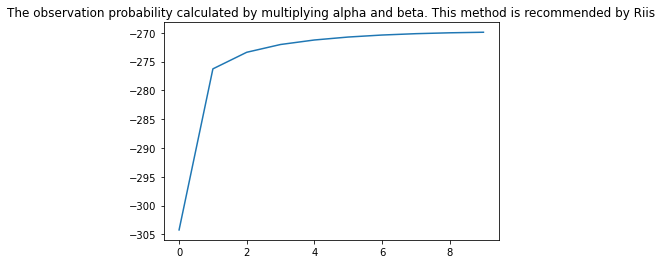

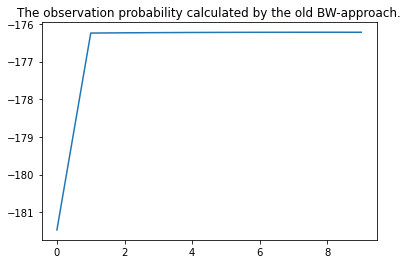

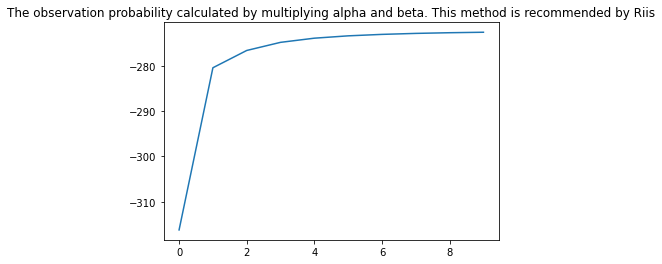

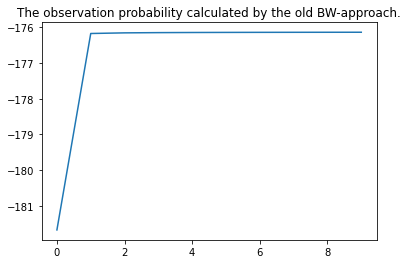

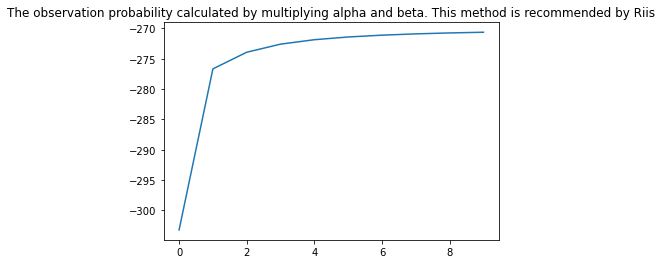

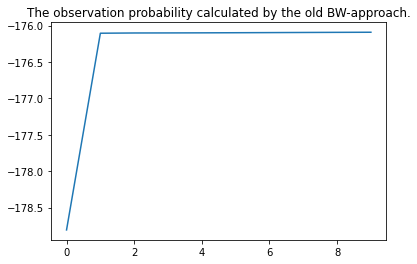

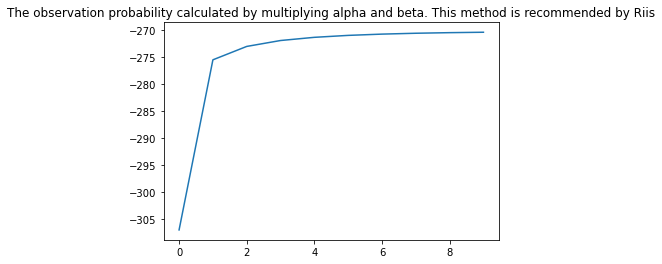

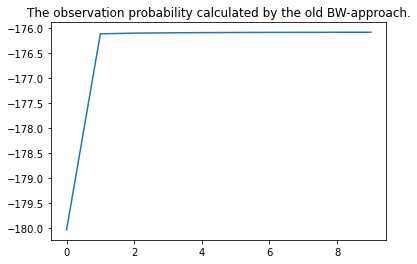

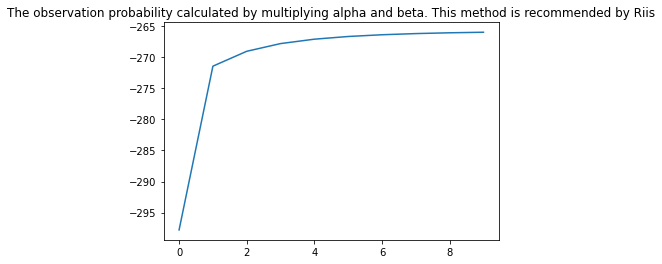

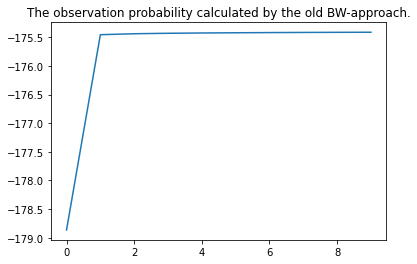

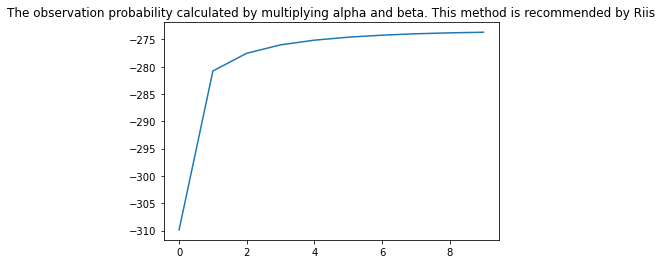

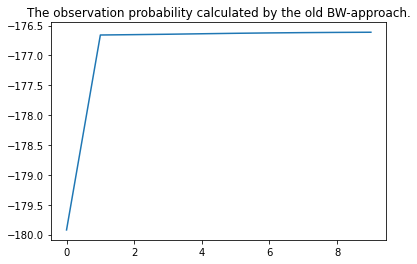

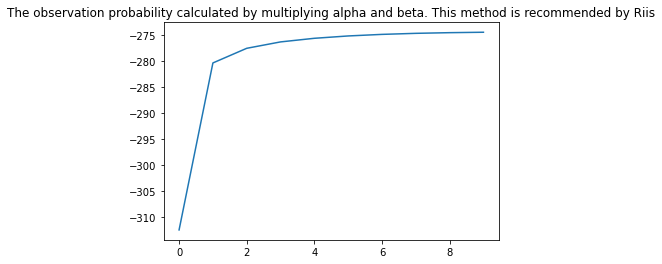

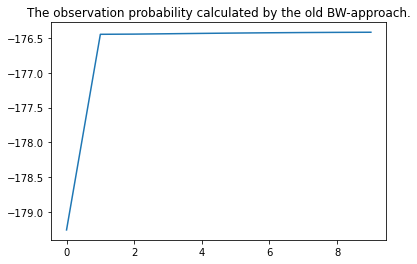

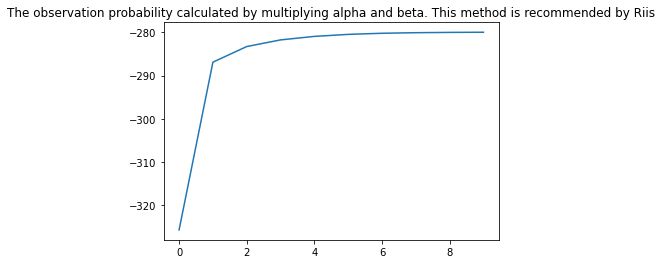

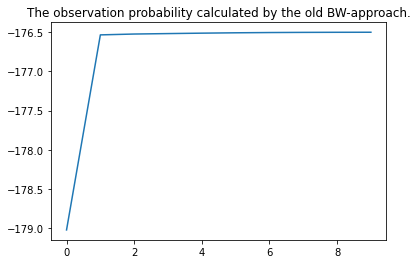

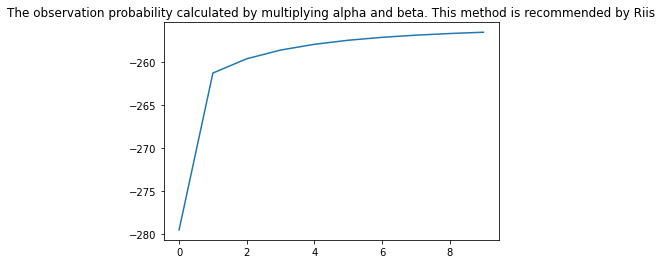

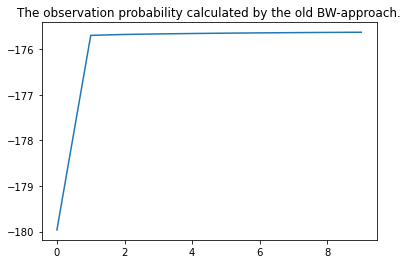

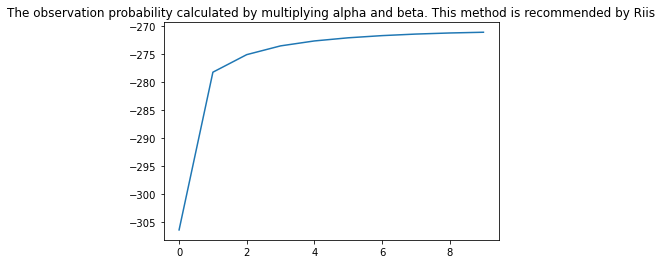

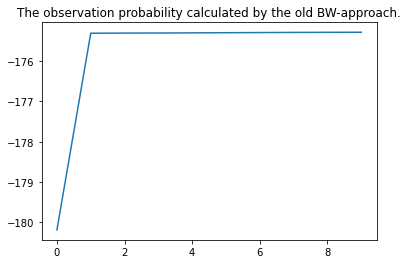

In [4]:
K = 8
L = 16
T = 1024
N = 64
noise = 0.2
max_iter = 10
for i in range(10):
    A_gt, B_gt, pi_gt, P_gt, observations, states, labels = hmmgenerate(K, L, T, N, S=0, D=0, edhmm = False, complete=False)
    A_init, B_init, pi_init, P_init = get_initial_values(A_gt, B_gt, noise, P_gt, have_P = True)

    A = A_init
    B = B_init
    P = P_init
    pi = pi_init
    A_wo_norm, B_wo_norm, P_wo_norm, pi_wo_norm, ln_P_wo_norm_c, ln_P_wo_norm_old_BW = wo_norm_fit(A, B, P, pi, observations, labels, max_iter, update_A=True, update_B=True, update_P=True, update_pi=True)
    plt.plot(ln_P_wo_norm_c)
    plt.title("The observation probability calculated by multiplying alpha and beta. This method is recommended by Riis")
    plt.show()
    
    plt.plot(ln_P_wo_norm_old_BW)
    plt.title("The observation probability calculated by the old BW-approach.")
    plt.show()

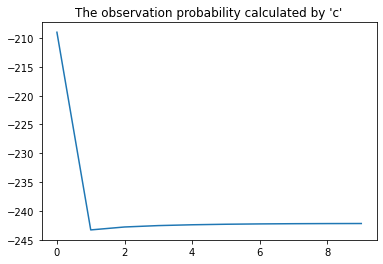

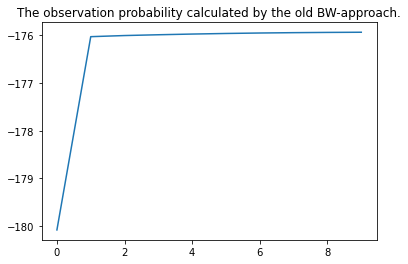

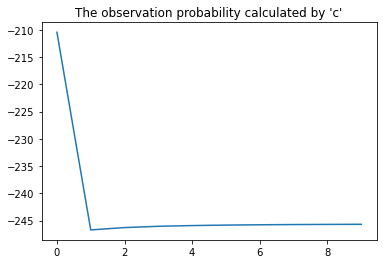

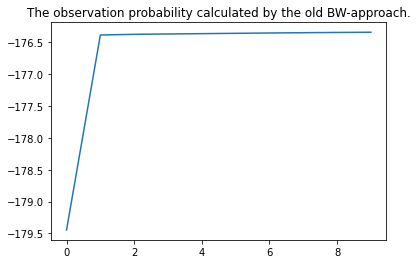

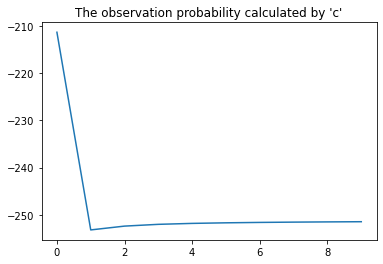

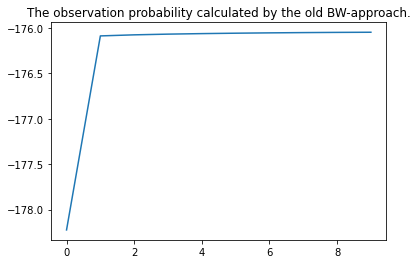

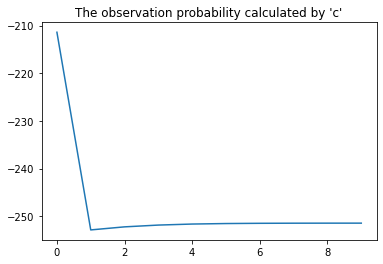

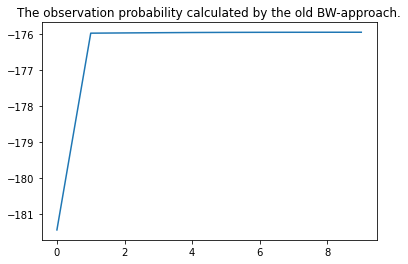

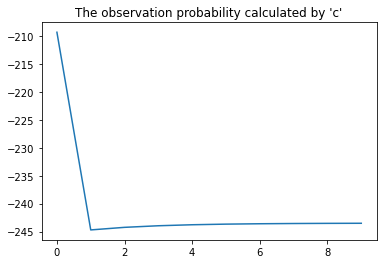

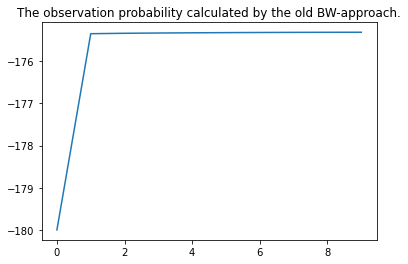

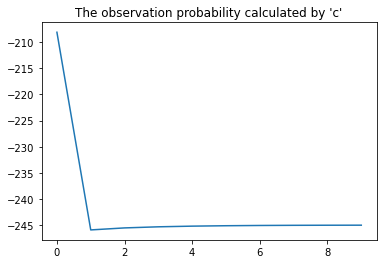

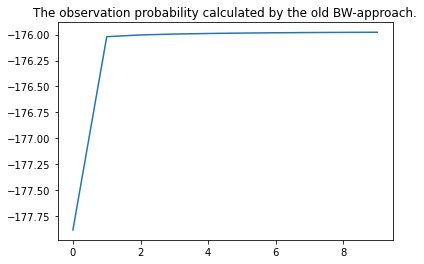

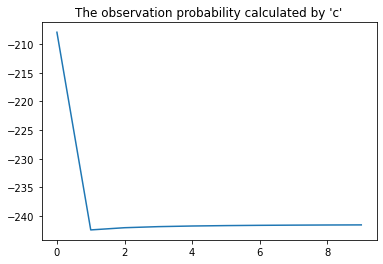

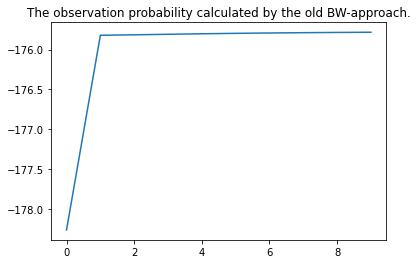

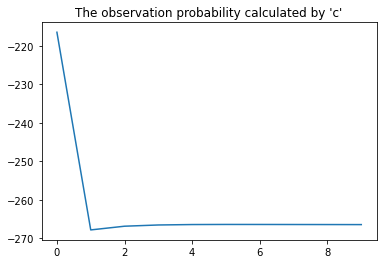

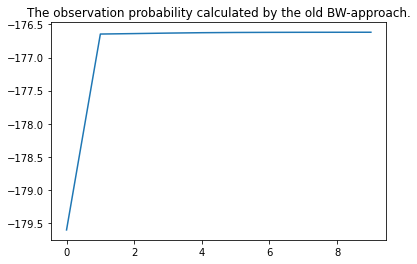

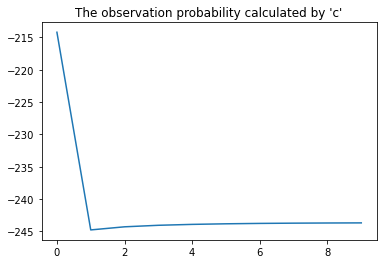

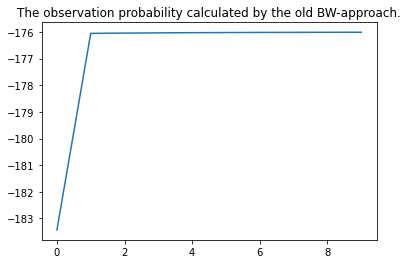

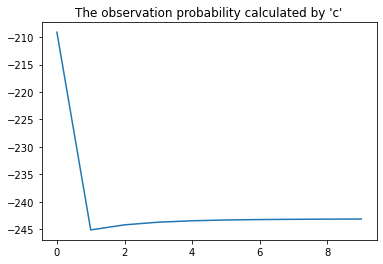

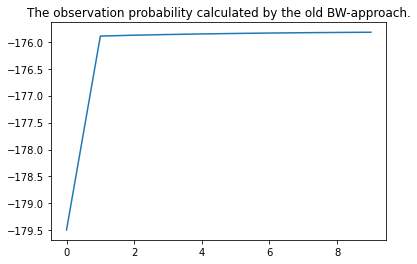

In [5]:
K = 8
L = 16
T = 1024
N = 64
noise = 0.2
max_iter = 10
for i in range(10):
    A_gt, B_gt, pi_gt, P_gt, observations, states, labels = hmmgenerate(K, L, T, N, S=0, D=0, edhmm = False, complete=False)
    A_init, B_init, pi_init, P_init = get_initial_values(A_gt, B_gt, noise, P_gt, have_P = True)

    A = A_init
    B = B_init
    P = P_init
    pi = pi_init

    A_norm, B_norm, P_norm, pi_norm, ln_P_norm_c, ln_P_norm_old_BW = norm_fit(A, B, P, pi, observations, labels, max_iter, update_A=True, update_B=True, update_P=True, update_pi=True)    
    plt.plot(ln_P_norm_c)
    plt.title("The observation probability calculated by 'c'")
    plt.show()
    
    plt.plot(ln_P_norm_old_BW)
    plt.title("The observation probability calculated by the old BW-approach.")
    plt.show()
    
    